## **Data Collection**

In [3]:
## packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('data.csv')
print(df.shape)
tf = pd.read_csv('data2.csv')
print(tf.shape)

(388, 55)
(8068, 11)


In [148]:
df.head(3)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."


In [ ]:
tf.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [119]:
tf.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

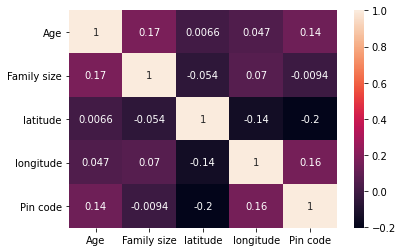

In [ ]:
sns.heatmap(df.corr(), annot=True)

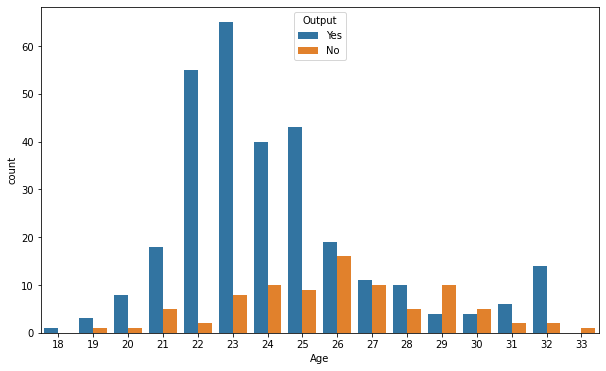

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Age", data=df, hue='Output')

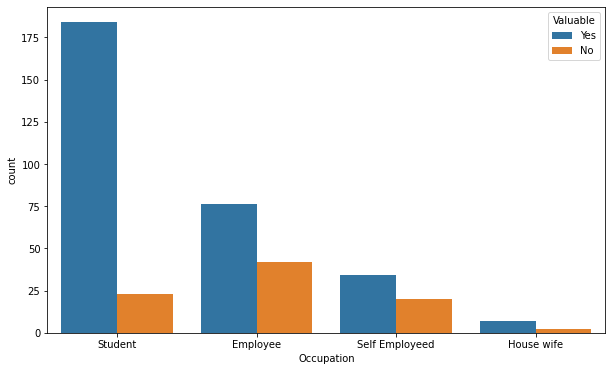

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Occupation", data=df, hue='Valuable')

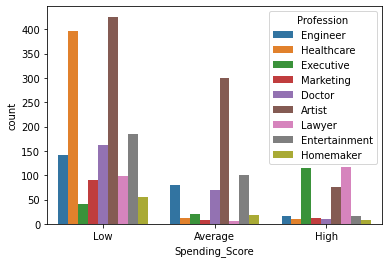

In [ ]:
sns.countplot(x="Spending_Score", data=tf, hue="Profession")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


## **Data Visualization**

In [ ]:
## packages

import matplotlib.pyplot as plt
import seaborn as sns

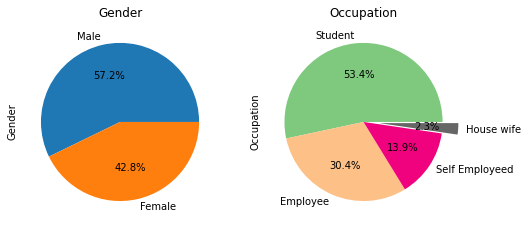

In [ ]:
plt.figure(1, figsize=(8,8))
plt.subplot(221)
df["Gender"].value_counts().plot.pie(title='Gender',autopct="%1.1f%%")
plt.subplot(222)
df['Occupation'].value_counts().plot.pie(title='Occupation',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0.2])
plt.show()

In [ ]:
df["Output"].value_counts()

Yes    301
No      87
Name: Output, dtype: int64

In [140]:
print("------Dataset 1---------")
print(df.isnull().sum().sort_values(ascending=False)[1:] / 388 * 100)
print("------Dataset 2---------")
print(tf.isnull().sum().sort_values(ascending=False)[1:] / 8068 * 100)

------Dataset 1---------
Meal(P2)                                     0.0
Health Concern                               0.0
Self Cooking                                 0.0
Good Tracking system                         0.0
Good Food quality                            0.0
More Offers and Discount                     0.0
Easy Payment option                          0.0
More restaurant choices                      0.0
Time saving                                  0.0
Ease and convenient                          0.0
Perference(P2)                               0.0
Perference(P1)                               0.0
Meal(P1)                                     0.0
Poor Hygiene                                 0.0
Medium (P2)                                  0.0
Medium (P1)                                  0.0
Pin code                                     0.0
longitude                                    0.0
latitude                                     0.0
Family size                                 

In [154]:
tf.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [8]:
def fillna(title): 
  tf[title].fillna(int(tf[title].mean()), inplace=True)

titles=['Gender', 'Ever_Married', 'Graduated', 'Profession',
       'Work_Experience', 'Family_Size', 'Var_1']
for x in titles:
  fillna(x)

In [149]:
print('Duplicated value(s) on the dataset1 : ', df.duplicated().sum())
print('Duplicated value(s) on the dataset2 : ', tf.duplicated().sum())

Duplicated value(s) on the dataset1 :  102
Duplicated value(s) on the dataset2 :  0


In [6]:
def remove_duplicate(data):
    print("Before removing duplicates - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("After removing duplicates - No. of Rows = ",data.shape[0])
    
    return data
df= remove_duplicate(df)
print('Duplicated value(s) on the dataset1 : ', df.duplicated().sum())

Before removing duplicates - No. of Rows =  388
After removing duplicates - No. of Rows =  286
Duplicated value(s) on the dataset1 :  0


In [218]:
df[0:5]

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,0,2,3,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,1,2,3,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,0,2,3,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,1,2,3,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [7]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_gender.fit(['Female','Male'])
df.iloc[:,1] = le_gender.transform(df.iloc[:,1]) 


le_marital = LabelEncoder()
le_marital.fit(['Single', 'Married','Prefer not to say'])
df.iloc[:,2] = le_marital.transform(df.iloc[:,2])


le_occupation = LabelEncoder()
le_occupation.fit([ 'Student', 'Employee','Self Employeed','House wife'])
df.iloc[:,3] = le_occupation.transform(df.iloc[:,3]) 
df.head(3)
##---------------------------
for i in ['Gender' , 'Ever_Married' , 'Graduated','Profession','Spending_Score','Var_1'  ]:
    le = LabelEncoder()
    tf[i] = le.fit_transform(tf[i].astype('str'))

tf[0:5]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,D
1,462643,0,1,38,1,2,NaN,0,3.0,3,A
2,466315,0,1,67,1,2,1.0,2,1.0,5,B
3,461735,1,1,67,1,7,0.0,1,2.0,5,B
4,462669,0,1,40,1,3,NaN,1,6.0,5,A


In [157]:
tf[0:5]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,D
1,462643,0,1,38,1,2,2.0,0,3.0,3,A
2,466315,0,1,67,1,2,1.0,2,1.0,5,B
3,461735,1,1,67,1,7,0.0,1,2.0,5,B
4,462669,0,1,40,1,3,2.0,1,6.0,5,A


In [211]:
df[0:5]

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,0,2,3,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,1,2,3,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,0,2,3,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,1,2,3,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [ ]:
for i in range(286):
    if df["Monthly Income"].values[i] == "No Income":
        df["Monthly Income"].values[i] = 0
    elif df["Monthly Income"].values[i] == "Below Rs.10000":
        df["Monthly Income"].values[i] = 5000
    elif df["Monthly Income"].values[i] == "10001 to 25000":
        df["Monthly Income"].values[i] = 15000
    elif df["Monthly Income"].values[i] == "25001 to 50000":
        df["Monthly Income"].values[i] = 30000
    elif df["Monthly Income"].values[i] == "More than 50000":
        df["Monthly Income"].values[i] = 60000        

In [225]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [10]:
df_encoded = df[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Output']]
df_encoded.head(3)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output
0,20,0,2,3,0,Post Graduate,4,Yes
1,24,0,2,3,5000,Graduate,3,Yes
2,22,1,2,3,5000,Post Graduate,3,Yes


## **Segmentation**

### 1. Demographic Analysis

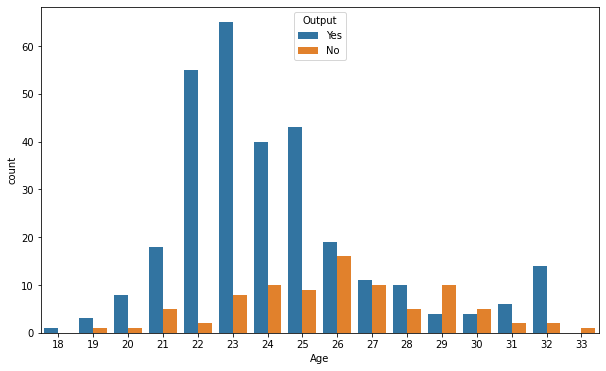

In [ ]:
## Age Wise
plt.figure(figsize=(10,6))
sns.countplot(x="Age", data=df, hue='Output')

Here we can see that the customers below 25 age are most likely to get churn.
And the optimal target age group should be 26 to 30. 

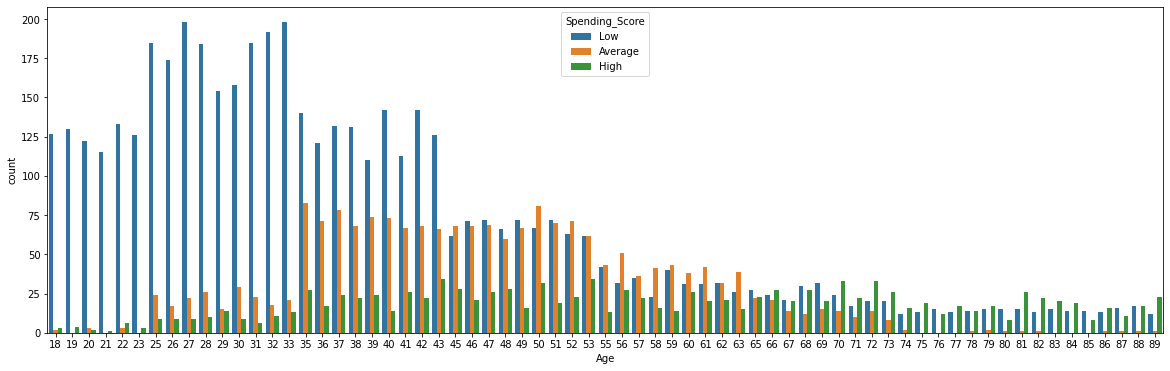

In [ ]:
## spending vs age
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=tf, hue="Spending_Score")

Here we can clearly see that customers below 33 usually have low spending scores and customer in range 35 to 50 have good spending score.
But we have to consider the size too because maximum customer are usally below 35 years age.

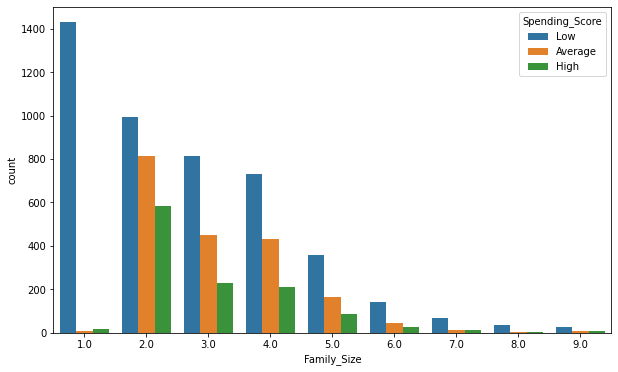

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Family_Size", data=tf, hue="Spending_Score")

Clearly we can see customer having 2 to 5 family members have good spending score compare to singles which have low spending score which is understandable.

### 2. Geographic Analysis

In [ ]:
!pip install geopandas
!pip install folium

In [ ]:
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
# Creating the map
m_1 = folium.Map(location=[12.9716,77.5946], tiles='cartodbpositron', zoom_start=13, width='50%', height='50%')
Age_band = df[(df.Age.isin(range(18,40)))]
# Adding points to the map
mc = MarkerCluster()
for idx, row in Age_band.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_1.add_child(mc)

# Displaying the map
m_1

In [ ]:
df["Ease and convenient"].unique()

array(['Neutral', 'Strongly agree', 'Agree', 'Strongly disagree',
       'Disagree'], dtype=object)

In [ ]:
# Create a base map
m_2 = folium.Map(location=[12.9716,77.5946], tiles='cartodbpositron', zoom_start=13, width='50%', height='50%')

def color_producer(val):
  if val == 'Neutral':
    return 'yellow'
  elif val == 'Agree':
    return 'green'
  elif val == 'Strongly agree':
    return 'lightgreen'
  elif val == 'Strongly disagree':
    return 'red'
  elif val == 'Disagree':
    return 'orange'

# Add a bubble map to the base map
for i in range(0,len(Age_band)):
    Circle(location=[Age_band.iloc[i]['latitude'], Age_band.iloc[i]['longitude']], radius=50, color=color_producer(Age_band.iloc[i]["Ease and convenient"])).add_to(m_2)

# Display the map
m_2

### 3. Psychographic Analysis

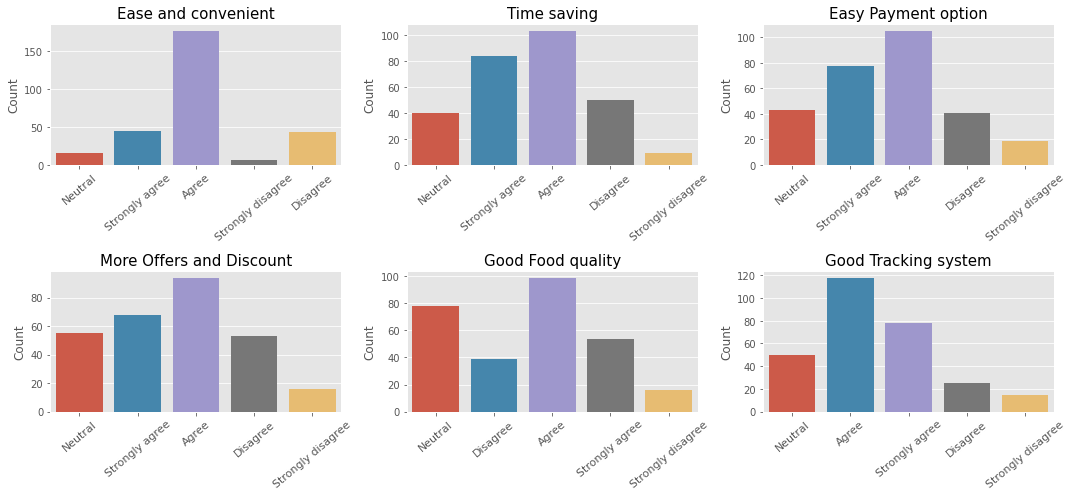

In [115]:
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')

def plotgraph(title,i):
  plt.subplot(2,3,i)
  ax = sns.countplot(x=title, data=df)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
  ax.set_title(title,fontsize = 15)
  ax.set_xlabel('',fontsize = 12)
  ax.set_ylabel('Count', fontsize = 12)
  plt.tight_layout()

titles = ["Ease and convenient","Time saving","Easy Payment option","More Offers and Discount","Good Food quality","Good Tracking system"]
i=1
for each in titles:
  plotgraph(each,i)
  i+=1


In [111]:
df["Good Taste "].nunique()

5

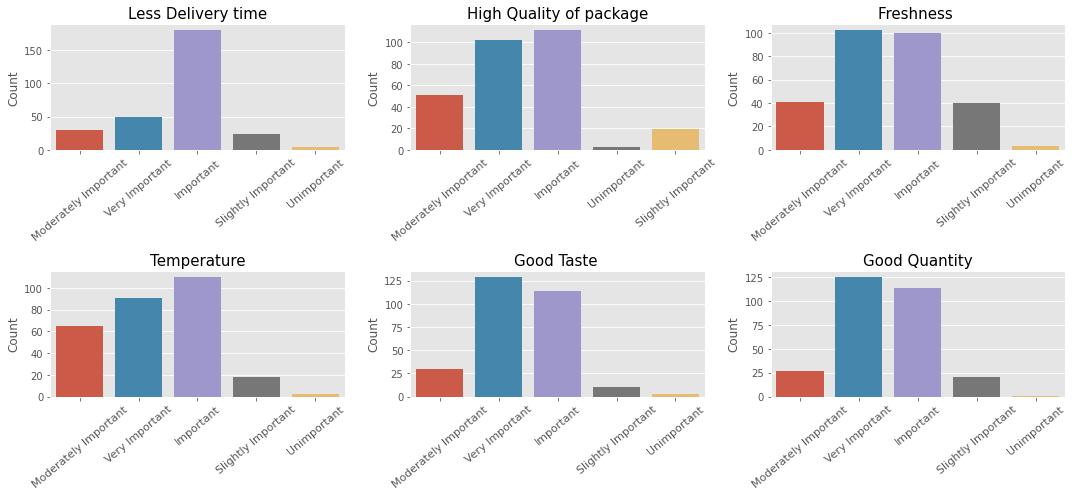

In [116]:
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')
titles = ['Less Delivery time','High Quality of package','Freshness ','Temperature', 'Good Taste ', 'Good Quantity']
i=1
for each in titles:
  plotgraph(each,i)
  i+=1

### 4. Behavioral Segmentation

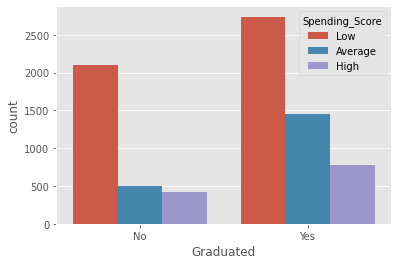

In [166]:
sns.countplot(x="Graduated", data=tf, hue="Spending_Score")

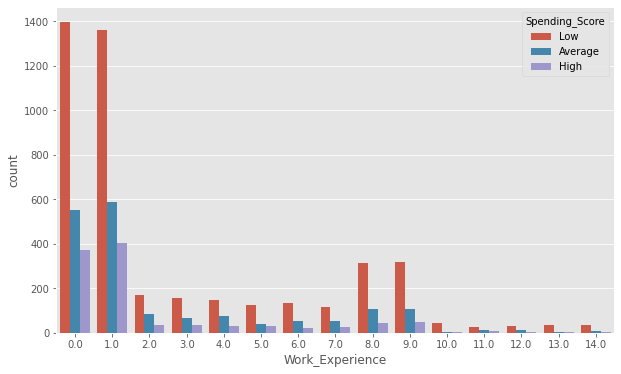

In [170]:
plt.figure(figsize=(10,6))
sns.countplot(x="Work_Experience", data=tf, hue="Spending_Score")

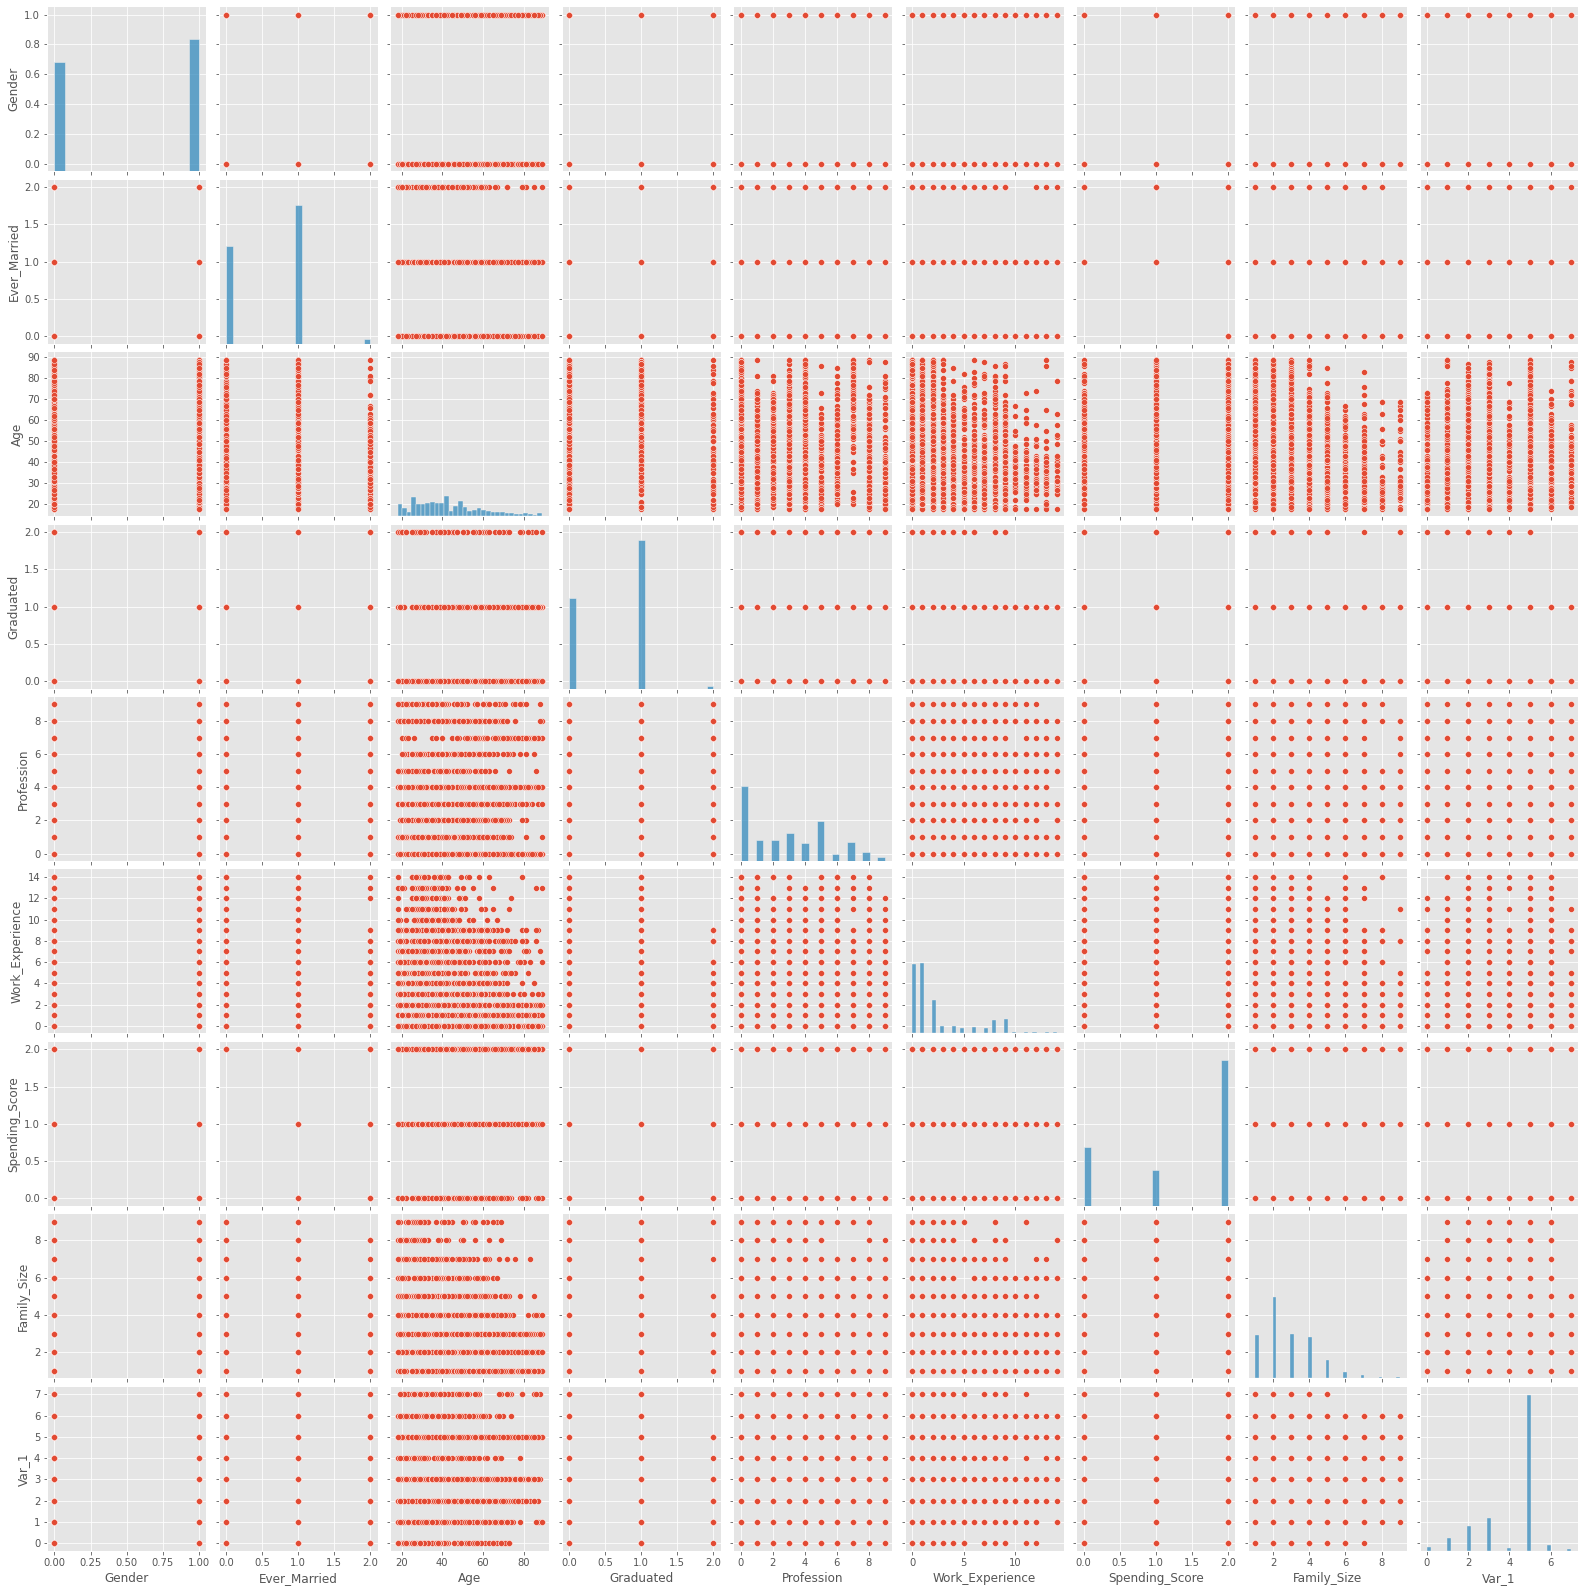

In [210]:
sns.pairplot(tf)

## **Segmentation**

In [12]:
from sklearn.cluster import KMeans

In [11]:
tf.drop("ID", axis=1, inplace=True)
tf.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,D
1,0,1,38,1,2,2.0,0,3.0,3,A
2,0,1,67,1,2,1.0,2,1.0,5,B


In [227]:
df_encoded.head(3)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output
0,20,0,2,3,0,Post Graduate,4,Yes
1,24,0,2,3,5000,Graduate,3,Yes
2,22,1,2,3,5000,Post Graduate,3,Yes


In [62]:
clus = tf.loc[:,["Age","Spending_Score"]].values ## Age and spending score
clus2 = df.iloc[:,[0,6]].values

In [91]:
def findK(clus):
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(clus)
    wcss.append(kmeans.inertia_)
  return wcss
def plotElbow2d(wcss):
  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
  plt.plot(range(1,11), wcss)
  plt.title('The Elbow Point Graph')
  plt.show()

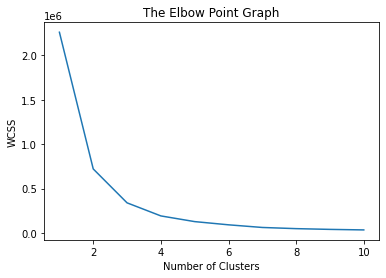

In [64]:
wcss = findK(clus)
plotElbow2d(wcss)

In [65]:
kmeans = KMeans(n_clusters=2, init='k-means++')
Y = kmeans.fit_predict(clus)

In [76]:
def plotseg(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

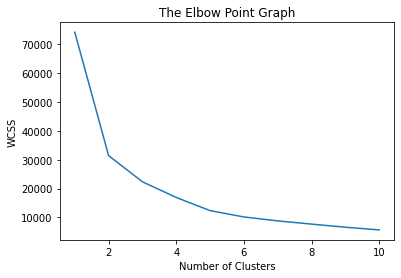

In [92]:
clus = tf.loc[:,["Family_Size","Profession"]].values
wcss = findK(clus)
plotElbow2d(wcss)

In [98]:
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)

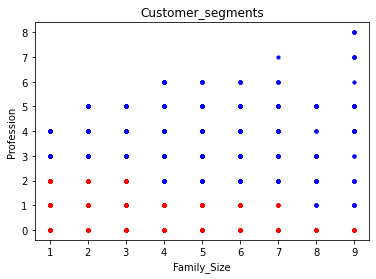

In [99]:
plotseg(clus, Y, ["Family_Size","Profession"])

#### K Means for 3 variables


In [52]:
def plotElbow(inertia):
  plt.plot(np.arange(1 , 11) , inertia , 'o')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.show()

In [59]:
import plotly as py
import plotly.graph_objs as go

def calcKMean(i,X3):
  algorithm = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
  algorithm.fit(X3)
  labels3 = algorithm.labels_
  centroids3 = algorithm.cluster_centers_
  return labels3

def plot3d(data, titles, labels3):
  data['label3'] =  labels3
  trace1 = go.Scatter3d(
      x= data[titles[0]],
      y= data[titles[1]],
      z= data[titles[2]],
      mode='markers',
      marker=dict(
          color = data['label3'], 
          size= 5,
          line=dict(
              color= data['label3'],
              width= 12
          ),
          opacity=0.8
      )
  )
  data = [trace1]
  layout = go.Layout(
  #     margin=dict(
  #         l=0,
  #         r=0,
  #         b=0,
  #         t=0
  #     )
      title= 'Clusters',
      scene = dict(
              xaxis = dict(title  = titles[0]),
              yaxis = dict(title  = titles[1]),
              zaxis = dict(title  = titles[2])
          )
  )
  fig = go.Figure(data=data, layout=layout)
  py.offline.iplot(fig)

K Means using Age , Family Size and Spending Score

In [50]:
X3 = tf[['Age' , 'Family_Size' ,'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

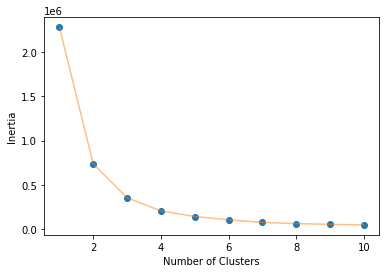

In [53]:
plotElbow(inertia)

In [57]:
labels3 =calcKMean()
plot3d(tf, ["Age","Family_Size","Spending_Score"], labels3)

K Means for Age Family Size and Var_1

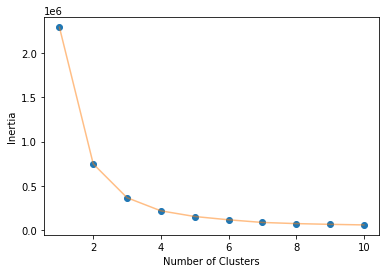

In [58]:
X3 = tf[['Age' , 'Family_Size' ,'Var_1']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plotElbow(inertia)

In [60]:
labels3=calcKMean(2,X3)
plot3d(tf,['Age' , 'Family_Size' ,'Var_1'],labels3)


## **Pricing Range**

# **MARKET DYNAMICS**

In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/epi_r.csv')
data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,0.001945,0.002244,0.005785,0.005536,0.000100,0.000598,0.068422,0.033214,0.000299,0.013415,0.000399,0.007630,0.013864,0.000997,0.010323,0.000050,0.000349,0.000349,0.013615,0.010074,0.046778,0.029274,0.220078,0.008827,0.002494,...,0.09231,0.104079,0.341412,0.000449,0.000249,0.000549,0.032815,0.000549,0.006234,0.000050,0.021195,0.001147,0.001297,0.000499,0.006882,0.003591,0.005585,0.001646,0.000050,0.000050,0.244664,0.002843,0.024287,0.001496,0.000898,0.000050,0.009525,0.154548,0.000199,0.005087,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,0.044060,0.047321,0.075840,0.074197,0.009987,0.024456,0.252475,0.179198,0.017296,0.115047,0.019971,0.087019,0.116929,0.031567,0.101080,0.007062,0.018681,0.018681,0.115888,0.099864,0.211169,0.168577,0.414309,0.093539,0.049874,...,0.28947,0.305371,0.474195,0.021181,0.015789,0.023416,0.178156,0.023416,0.078710,0.007062,0.144037,0.033849,0.035986,0.022327,0.082675,0.059816,0.074529,0.040535,0.007062,0.007062,0.429898,0.053242,0.153942,0.038652,0.029948,0.007062,0.097134,0.361482,0.014123,0.071142,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

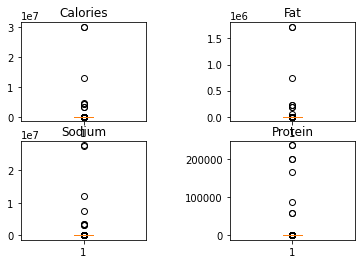

In [ ]:
#Nutritional Information

%matplotlib inline
nutrition = [['calories', 'fat'], ['sodium', 'protein']]
fig, ax = plt.subplots(2, 2)
for firstN in range(2):
    for secondN in range(2):
        temp = data[nutrition[firstN][secondN]]
        temp = temp.dropna()
        ax[firstN, secondN ].boxplot(temp)
        ax[firstN, secondN].set_title(nutrition[firstN][secondN].title())
plt.subplots_adjust(wspace = .66)

In [ ]:
data[['calories', 'fat', 'sodium', 'protein']].describe()


,calories,fat,sodium,protein
count,1.593500e+04,1.586900e+04,1.593300e+04,15890.000000
mean,6.322958e+03,3.468775e+02,6.225975e+03,100.160793
std,3.590460e+05,2.045611e+04,3.333182e+05,3840.318527
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.980000e+02,7.000000e+00,8.000000e+01,3.000000
50%,3.310000e+02,1.700000e+01,2.940000e+02,8.000000
75%,5.860000e+02,3.300000e+01,7.110000e+02,27.000000
max,3.011122e+07,1.722763e+06,2.767511e+07,236489.000000


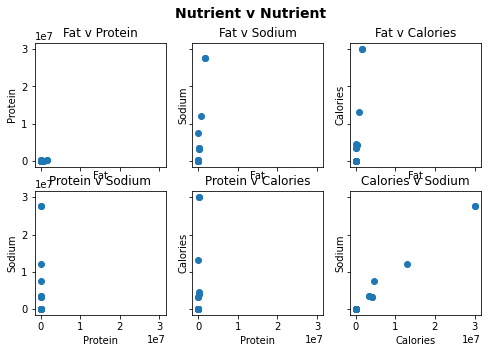

In [ ]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize = (8, 5))
plt.suptitle('Nutrient v Nutrient', fontweight = 'bold', fontsize = 14)
nutrient_v_nutrient = [['fat', 'protein'],
                       ['fat', 'sodium'],
                       ['fat', 'calories'],
                       ['protein', 'sodium'],
                       ['protein', 'calories'],
                       ['calories', 'sodium']]
counter_x = 0
counter_y = 0

for pairing in nutrient_v_nutrient:
    temp = data[pairing]
    ax[counter_x, counter_y].scatter(temp[pairing[0]].values, temp[pairing[1]].values)
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)

    counter_y += 1
    if counter_y > 2:
        counter_y = 0
        counter_x += 1

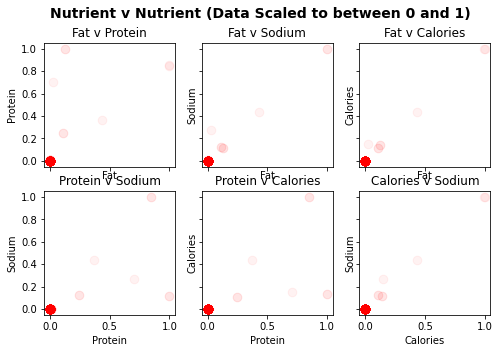

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
counter_x = 0
counter_y = 0

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize = (8, 5))
plt.suptitle('Nutrient v Nutrient (Data Scaled to between 0 and 1)', fontweight = 'bold', fontsize = 14)

for pairing in nutrient_v_nutrient:
    temp = data[pairing].dropna()
    x_scaled = scaler.fit_transform(temp[pairing[0]].values.reshape(-1, 1))
    y_scaled = scaler.fit_transform(temp[pairing[1]].values.reshape(-1, 1))
#     The latest version of MinMaxScaler() demains the data be reshaped

    ax[counter_x, counter_y].scatter(x_scaled,
                                     y_scaled,
                                     color = 'red',
                                     s = 75,
                                    alpha = 0.05)
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)

    counter_y += 1
    if counter_y > 2:
        counter_y = 0
        counter_x += 1

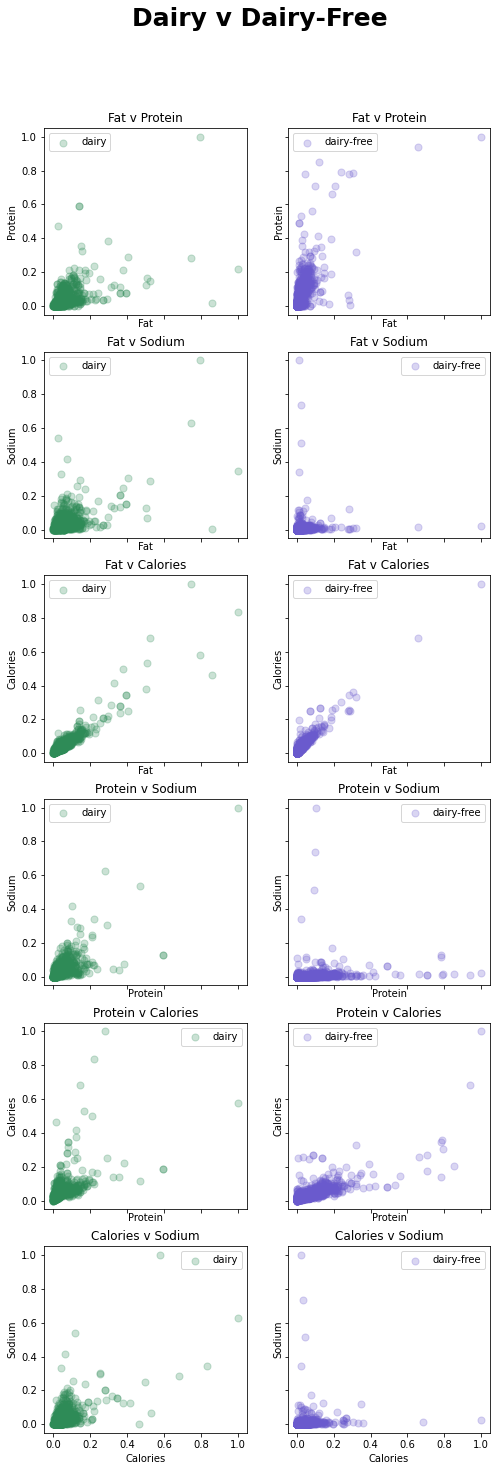

In [ ]:
fig, ax = plt.subplots(6, 2, sharex=True, sharey=True, figsize = (8, 24))
plt.suptitle('Dairy v Dairy-Free', fontsize = 25, fontweight='bold', y = 0.95)

counter_x = 0
counter_y = 0

for pairing in nutrient_v_nutrient:
    temp = data[data['dairy'] == 1].copy()
    temp = temp[pairing]
    temp = temp.dropna()
    x_scaled = scaler.fit_transform(temp[pairing[0]].values.reshape(-1, 1))
    y_scaled = scaler.fit_transform(temp[pairing[1]].values.reshape(-1, 1))

    ax[counter_x, counter_y].scatter(x_scaled,
                                     y_scaled,
                                     color = 'seagreen',
                                     s = 50,
                                    alpha = 0.25,
                                    label = 'dairy')
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)
    ax[counter_x, counter_y].legend()

    counter_x += 1
    
counter_y = 1
counter_x = 0



for pairing in nutrient_v_nutrient:
    temp = data[data['dairy free'] == 1].copy()
    temp = temp.dropna()
    temp = temp[pairing]
    x_scaled = scaler.fit_transform(temp[pairing[0]].values.reshape(-1, 1))
    y_scaled = scaler.fit_transform(temp[pairing[1]].values.reshape(-1, 1))

    ax[counter_x, counter_y].scatter(x_scaled,
                                     y_scaled,
                                     color = 'slateblue',
                                     s = 50,
                                    alpha = 0.25,
                                    label = 'dairy-free')
    ax[counter_x, counter_y].set_xlabel(pairing[0].title())
    ax[counter_x, counter_y].set_ylabel(pairing[1].title())
    current_title = " v ".join([pairing[0].title(), pairing[1].title()])
    ax[counter_x, counter_y].set_title(current_title)
    ax[counter_x, counter_y].legend()
    counter_x += 1